In [16]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [17]:
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,...,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,...,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,...,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,...,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,...,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


In [18]:
df.columns

Index(['Unnamed: 0', 'Id', 'groupId', 'matchId', 'assists', 'boosts',
       'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace',
       'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'matchType', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

In [19]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111742 entries, 0 to 1111741
Data columns (total 29 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Id               1111742 non-null  object 
 1   groupId          1111742 non-null  object 
 2   matchId          1111742 non-null  object 
 3   assists          1111742 non-null  int64  
 4   boosts           1111742 non-null  int64  
 5   damageDealt      1111742 non-null  float64
 6   DBNOs            1111742 non-null  int64  
 7   headshotKills    1111742 non-null  int64  
 8   heals            1111742 non-null  int64  
 9   killPlace        1111742 non-null  int64  
 10  killPoints       1111742 non-null  int64  
 11  kills            1111742 non-null  int64  
 12  killStreaks      1111742 non-null  int64  
 13  longestKill      1111742 non-null  float64
 14  matchDuration    1111742 non-null  int64  
 15  matchType        1111742 non-null  object 
 16  maxPlace         1

In [21]:
df.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,...,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111742e+06,1.111741e+06
mean,2.336738e-01,1.106655e+00,1.307364e+02,6.573612e-01,2.266488e-01,1.370348e+00,4.759562e+01,5.044301e+02,9.255097e-01,5.448503e-01,...,1.641784e-01,6.042142e+02,3.551184e-03,4.545068e+00,2.401097e-02,7.833652e-03,1.153282e+03,3.659685e+00,6.057065e+02,4.727868e-01
std,5.894028e-01,1.716050e+00,1.711755e+02,1.146023e+00,6.033356e-01,2.683819e+00,2.747025e+01,6.274006e+02,1.562216e+00,7.129032e-01,...,4.704189e-01,1.495949e+03,7.385452e-02,3.061857e+01,1.678909e-01,9.194621e-02,1.182788e+03,2.461805e+00,7.395140e+02,3.073771e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.552000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.411000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.841000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.859000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.171000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,7.927500e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.975000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,1.700000e+01,2.400000e+01,5.990000e+03,3.500000e+01,6.400000e+01,7.300000e+01,1.000000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,2.300000e+01,3.540000e+04,1.400000e+01,2.668000e+03,1.000000e+01,5.000000e+00,1.396000e+04,1.770000e+02,2.002000e+03,1.000000e+00


In [22]:
df.corr()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
assists,1.000000,0.306582,0.409369,0.302200,0.199487,0.228456,-0.289984,0.038331,0.322068,0.243386,...,0.197938,0.110496,0.012366,0.022871,0.007775,0.058241,0.288579,0.244595,0.023341,0.297738
boosts,0.306582,1.000000,0.519600,0.357903,0.331536,0.535388,-0.554046,0.008992,0.499478,0.403484,...,0.254125,0.329281,0.033775,0.107880,0.014645,0.085997,0.639361,0.405301,-0.006973,0.633482
damageDealt,0.409369,0.519600,1.000000,0.735084,0.613306,0.341620,-0.676134,0.050217,0.889038,0.703222,...,0.256318,0.139840,0.050660,0.037509,0.016209,0.079901,0.396621,0.354515,0.017990,0.438973
DBNOs,0.302200,0.357903,0.735084,1.000000,0.467393,0.265348,-0.554858,0.042139,0.706211,0.646344,...,0.301098,0.101882,0.035705,0.018726,0.071295,0.059857,0.284051,0.217667,0.010483,0.279322
headshotKills,0.199487,0.331536,0.613306,0.467393,1.000000,0.197936,-0.468079,0.024203,0.673739,0.513207,...,0.149131,0.076275,0.011974,0.029988,0.009198,0.039857,0.249591,0.215613,0.005029,0.276170
heals,0.228456,0.535388,0.341620,0.265348,0.197936,1.000000,-0.385497,-0.001990,0.310537,0.268948,...,0.236400,0.297734,0.023416,0.080991,0.035847,0.062720,0.429283,0.308229,-0.010303,0.427296
killPlace,-0.289984,-0.554046,-0.676134,-0.554858,-0.468079,-0.385497,1.000000,-0.023594,-0.728966,-0.809669,...,-0.270056,-0.236371,-0.057496,-0.089924,-0.039589,-0.072698,-0.590130,-0.489741,-0.002611,-0.719051
killPoints,0.038331,0.008992,0.050217,0.042139,0.024203,-0.001990,-0.023594,1.000000,0.036511,0.037883,...,0.012730,-0.027882,-0.004503,-0.005820,-0.039932,-0.009321,0.004883,-0.004246,0.983443,0.013089
kills,0.322068,0.499478,0.889038,0.706211,0.673739,0.310537,-0.728966,0.036511,1.000000,0.802054,...,0.253223,0.114665,0.061824,0.039986,0.019248,0.078644,0.373495,0.338190,0.007204,0.418527
killStreaks,0.243386,0.403484,0.703222,0.646344,0.513207,0.268948,-0.809669,0.037883,0.802054,1.000000,...,0.241888,0.098000,0.065413,0.034264,0.030051,0.062697,0.326998,0.275111,0.009182,0.376840


In [23]:
df.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

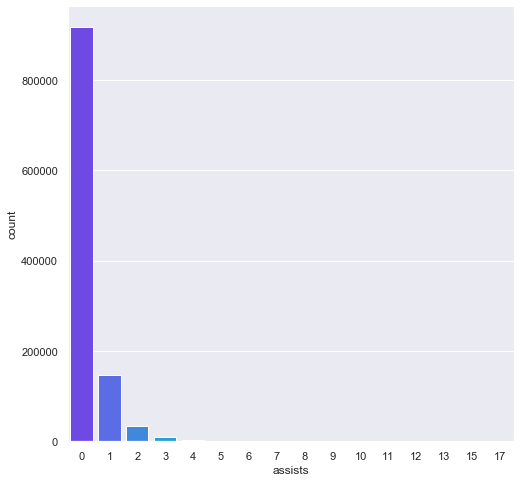

In [24]:
plt.figure(figsize = (8,8))
sns.countplot(x = df['assists'], palette = 'rainbow')
plt.show()

<Figure size 576x576 with 0 Axes>

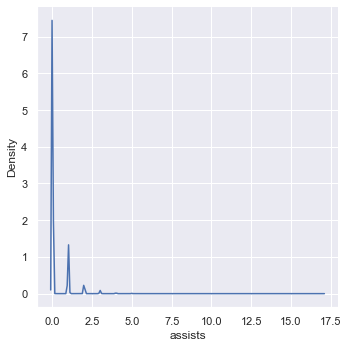

In [25]:
plt.figure(figsize=(8,8))
sns.displot(x= df['assists'],kind='kde')

In [27]:
no_matches = df.loc[:,"matchId"].nunique()
print("There are {} matches registered in our database.".format(no_matches))

There are 47951 matches registered in our database.


In [29]:
m_types = df.loc[:,"matchType"].value_counts().to_frame().reset_index()
m_types.columns = ["Type","Count"]
m_types

,Type,Count
0,squad-fpp,438781
1,duo-fpp,249927
2,squad,156573
3,solo-fpp,133854
4,duo,78039
5,solo,45679
6,normal-squad-fpp,4286
7,crashfpp,1581
8,normal-duo-fpp,1400
9,flaretpp,633


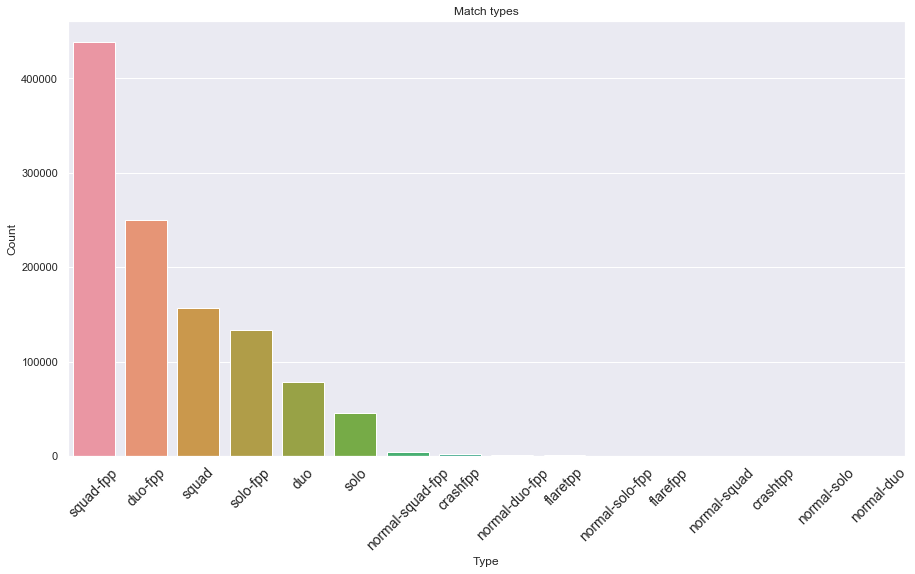

In [30]:
plt.figure(figsize=(15,8))
ticks = m_types.Type.values
ax = sns.barplot(x="Type", y="Count", data=m_types)
ax.set_xticklabels(ticks, rotation=45, fontsize=14)
ax.set_title("Match types")
plt.show()

In [31]:
m_types2 = df.loc[:,"matchType"].value_counts().to_frame()
aggregated_squads = m_types2.loc[["squad-fpp","squad","normal-squad-fpp","normal-squad"],"matchType"].sum()
aggregated_duos = m_types2.loc[["duo-fpp","duo","normal-duo-fpp","normal-duo"],"matchType"].sum()
aggregated_solo = m_types2.loc[["solo-fpp","solo","normal-solo-fpp","normal-solo"],"matchType"].sum()
aggregated_mt = pd.DataFrame([aggregated_squads,aggregated_duos,aggregated_solo], index=["squad","duo","solo"], columns =["count"])
aggregated_mt

,count
squad,599775
duo,329414
solo,180073


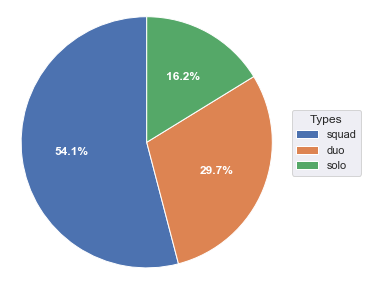

In [32]:
fig1, ax1 = plt.subplots(figsize=(5, 5))
labels = ['squad', 'duo', 'solo']

wedges, texts, autotexts = ax1.pie(aggregated_mt["count"],textprops=dict(color="w"), autopct='%1.1f%%', startangle=90)

ax1.axis('equal')
ax1.legend(wedges, labels,
          title="Types",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12, weight="bold")
plt.show()

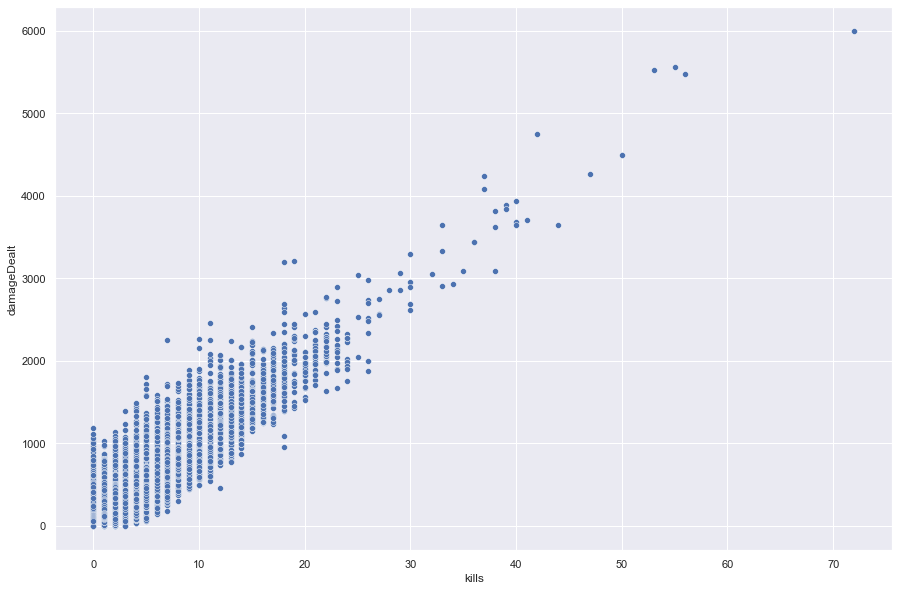

In [43]:
plt.figure(figsize=(15,10))
sns.scatterplot(x = "kills", y = 'damageDealt', data = df)
plt.show()

In [42]:
df[df['kills']>60]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
758017,06308c988bf0c2,4c4ee1e9eb8b5e,6680c7c3d17d48,7,4,5990.0,0,64,10,1,...,0,0.0,0,0.0,0,0,728.1,35,0,1.0


Maximum number of headshots that the player scored: 64


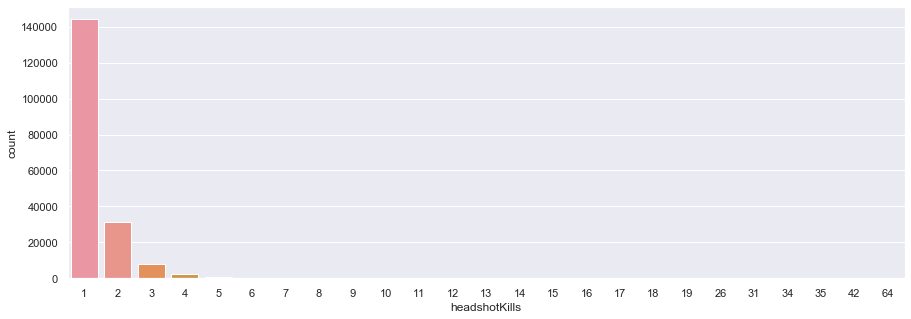

In [44]:
headshots = df[df['headshotKills']>0]
plt.figure(figsize=(15,5))
sns.countplot(headshots['headshotKills'].sort_values())
print("Maximum number of headshots that the player scored: " + str(df["headshotKills"].max()))

Mean number of DBNOs that the player scored: 0.6573611503388376


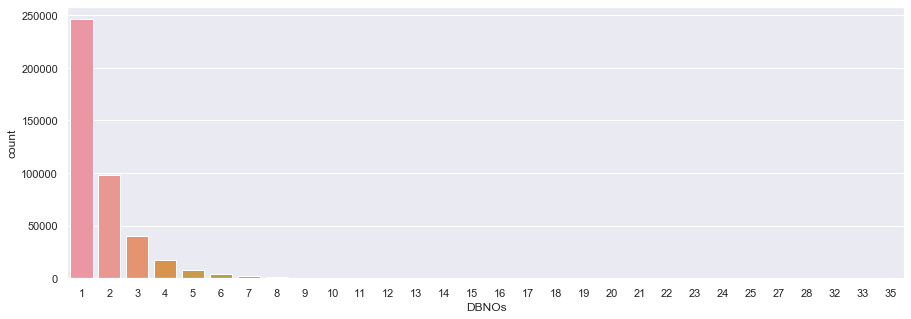

In [45]:
headshots = df[df['DBNOs']>0]
plt.figure(figsize=(15,5))
sns.countplot(headshots['DBNOs'].sort_values())
print("Mean number of DBNOs that the player scored: " + str(df["DBNOs"].mean()))

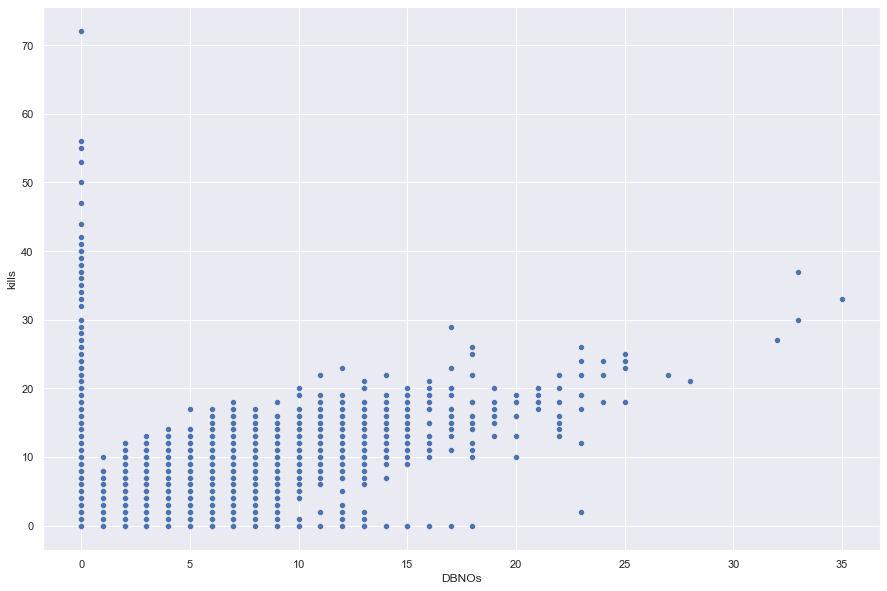

In [48]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="DBNOs",y="kills", data=df)
plt.show()

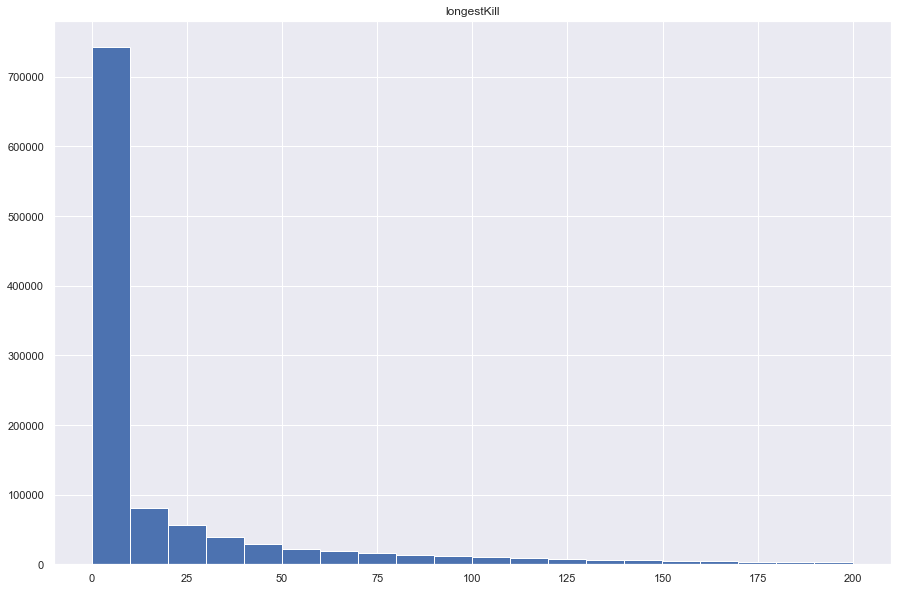

In [49]:
dist = df[df['longestKill']<200]
plt.rcParams['axes.axisbelow'] = True
dist.hist('longestKill', bins=20, figsize = (15,10))
plt.show()

In [51]:
print("Average longest kill distance a player achieve is {:.1f}m, 95% of them not more than {:.1f}m and a maximum distance is {:.1f}m." .format(df['longestKill'].mean(),df['longestKill'].quantile(0.95),df['longestKill'].max()))

Average longest kill distance a player achieve is 23.0m, 95% of them not more than 125.9m and a maximum distance is 1040.0m.


In [52]:
walk0 = df["walkDistance"] == 0
ride0 = df["rideDistance"] == 0
swim0 = df["swimDistance"] == 0
print("{} of players didn't walk at all, {} players didn't drive and {} didn't swim." .format(walk0.sum(),ride0.sum(),swim0.sum()))

24936 of players didn't walk at all, 827573 players didn't drive and 1039125 didn't swim.


Average place of non-walking players is 0.045, minimum is 0.0 and the best is 1.0, 95% of players has a score below 0.2553.


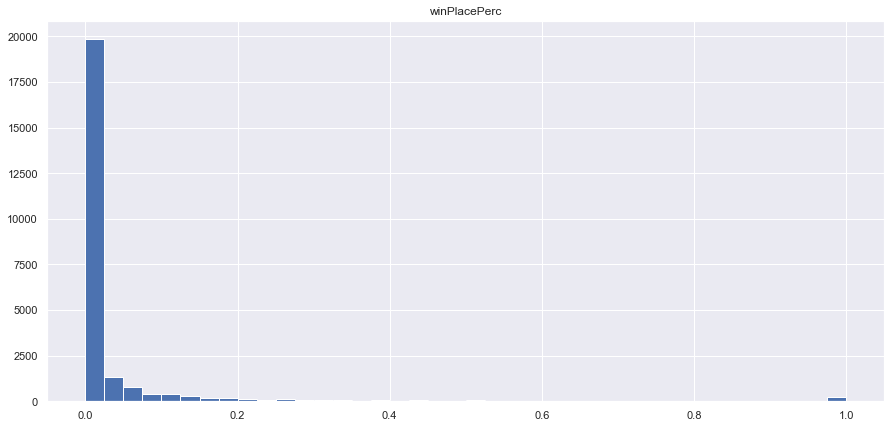

In [54]:
walk0_rows = df[walk0]
print("Average place of non-walking players is {:.3f}, minimum is {} and the best is {}, 95% of players has a score below {}." 
      .format(walk0_rows["winPlacePerc"].mean(), walk0_rows["winPlacePerc"].min(), walk0_rows["winPlacePerc"].max(),walk0_rows["winPlacePerc"].quantile(0.95)))
walk0_rows.hist('winPlacePerc', bins=40, figsize = (15,7))
plt.show()

In [55]:
suspects = df.query('winPlacePerc ==1 & walkDistance ==0').head()
suspects.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
5585,1ed752158c7bbc,338d6ab3bf5f19,4c6b1a0e4cb346,1,0,369.60,0,1,2,31,...,0,0.0,0,0.0,2,0,0.0,27,0,1.0
10034,ac43d9729a0605,c5f3b9e5fe1534,4202c9c526d2ad,0,0,38.48,0,0,0,3,...,0,0.0,0,0.0,0,0,0.0,6,0,1.0
10092,861fd334addd94,15ba030fd830cc,ed41b4340cd7af,1,0,524.40,0,0,2,20,...,0,0.0,0,0.0,0,0,0.0,14,1500,1.0
11952,974ce8673463bd,12ede3fef1318a,832accc40ad0e1,0,0,12.00,0,0,0,4,...,0,0.0,0,0.0,0,0,0.0,2,0,1.0
12242,62b4377d5c88e5,41ee1c036b0ffa,7d9d4b051fd1be,0,0,22.52,0,0,0,1,...,0,0.0,0,0.0,0,0,0.0,11,0,1.0


In [56]:
print("Maximum ride distance for suspected entries is {:.3f} meters, and swim distance is {:.1f} meters." .format(suspects["rideDistance"].max(), suspects["swimDistance"].max()))

Maximum ride distance for suspected entries is 0.000 meters, and swim distance is 0.0 meters.


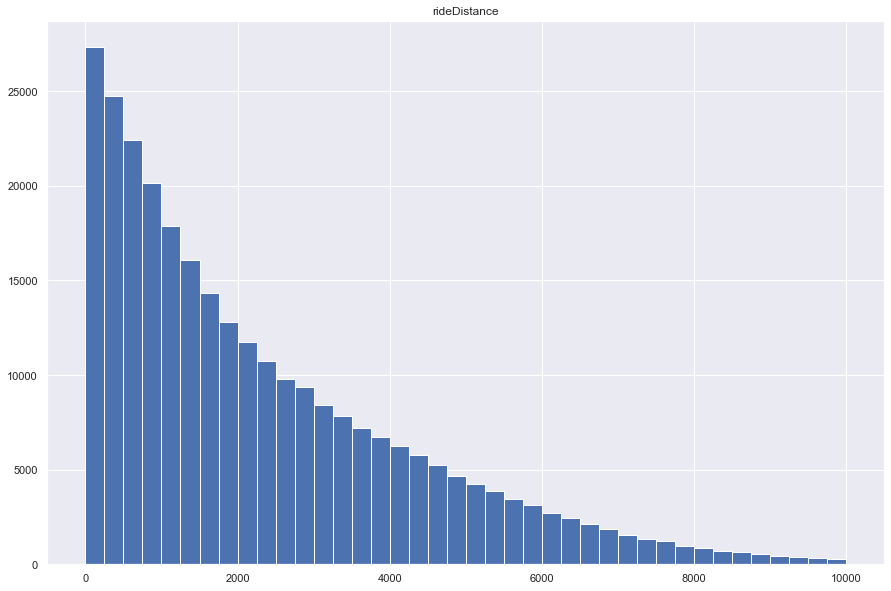

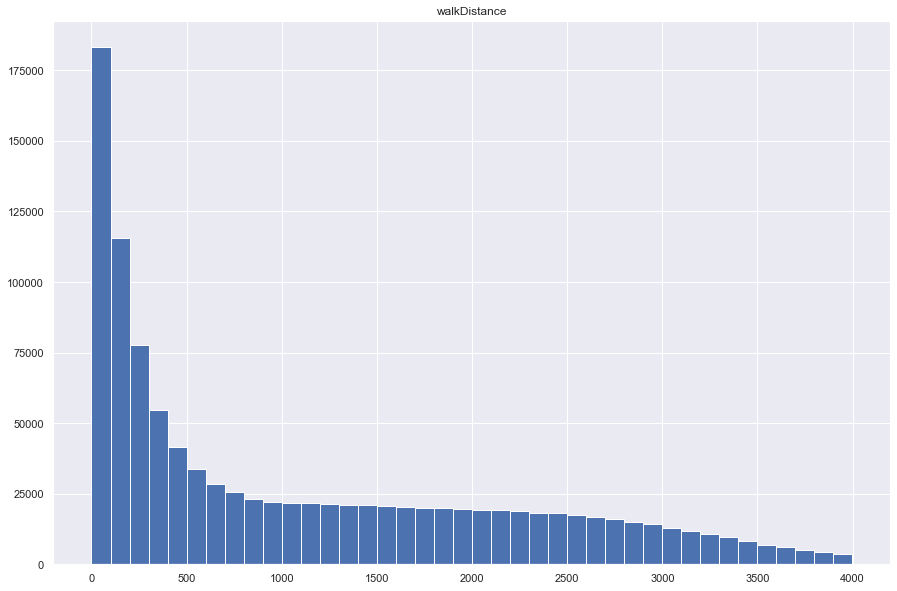

In [57]:
ride = df.query('rideDistance >0 & rideDistance <10000')
walk = df.query('walkDistance >0 & walkDistance <4000')
ride.hist('rideDistance', bins=40, figsize = (15,10))
walk.hist('walkDistance', bins=40, figsize = (15,10))
plt.show()

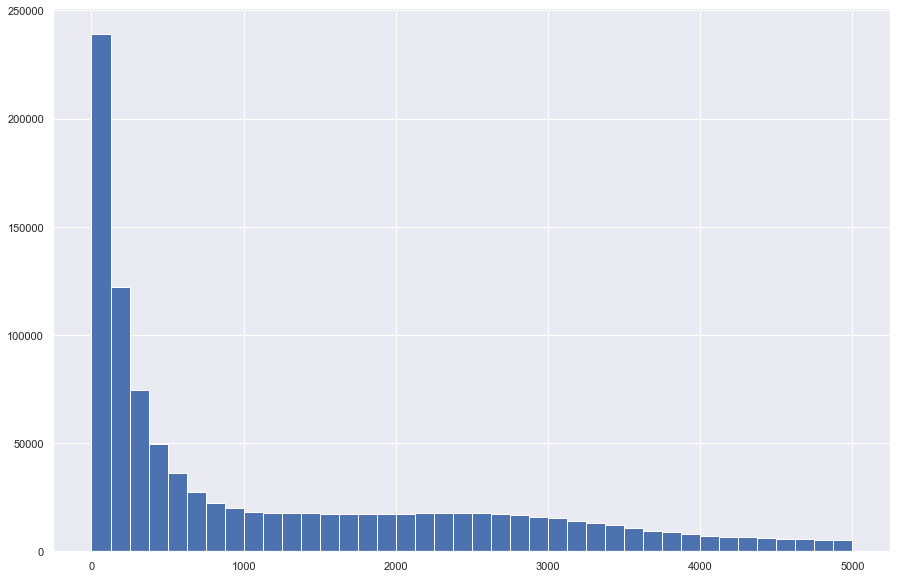

In [58]:
travel_dist = df["walkDistance"] + df["rideDistance"] + df["swimDistance"]
travel_dist = travel_dist[travel_dist<5000]
travel_dist.hist(bins=40, figsize = (15,10))

Average number of acquired weapons is 3.660, minimum is 0 and the maximum 177, 99% of players acquired less than weapons 10.0.


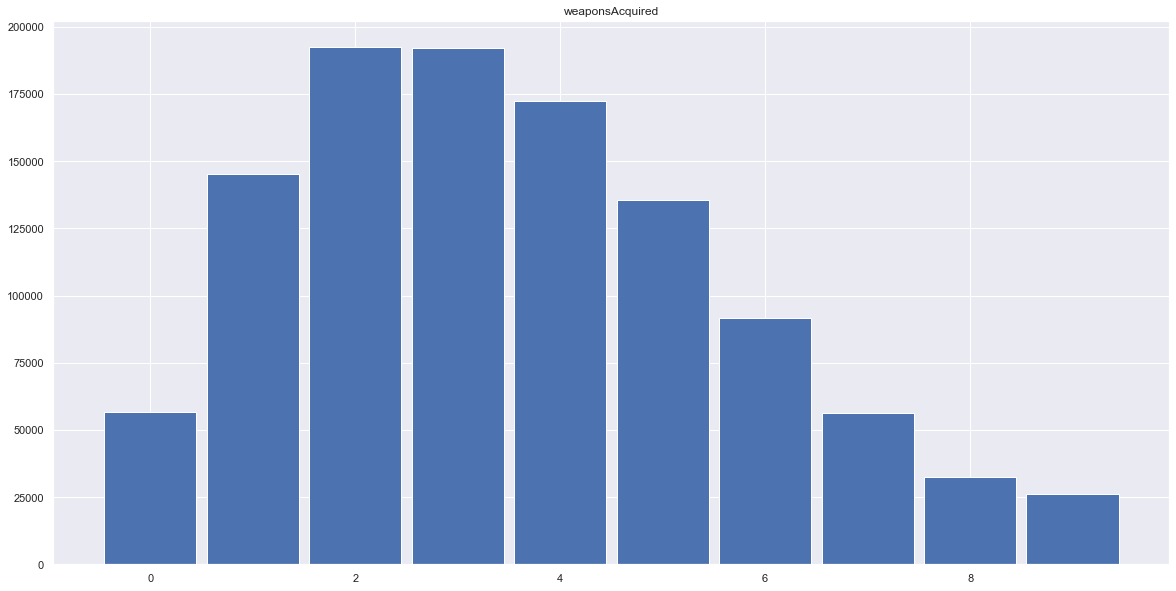

In [60]:
print("Average number of acquired weapons is {:.3f}, minimum is {} and the maximum {}, 99% of players acquired less than weapons {}." 
      .format(df["weaponsAcquired"].mean(), df["weaponsAcquired"].min(), df["weaponsAcquired"].max(), df["weaponsAcquired"].quantile(0.99)))
df.hist('weaponsAcquired', figsize = (20,10),range=(0, 10), align="left", rwidth=0.9)
plt.show()

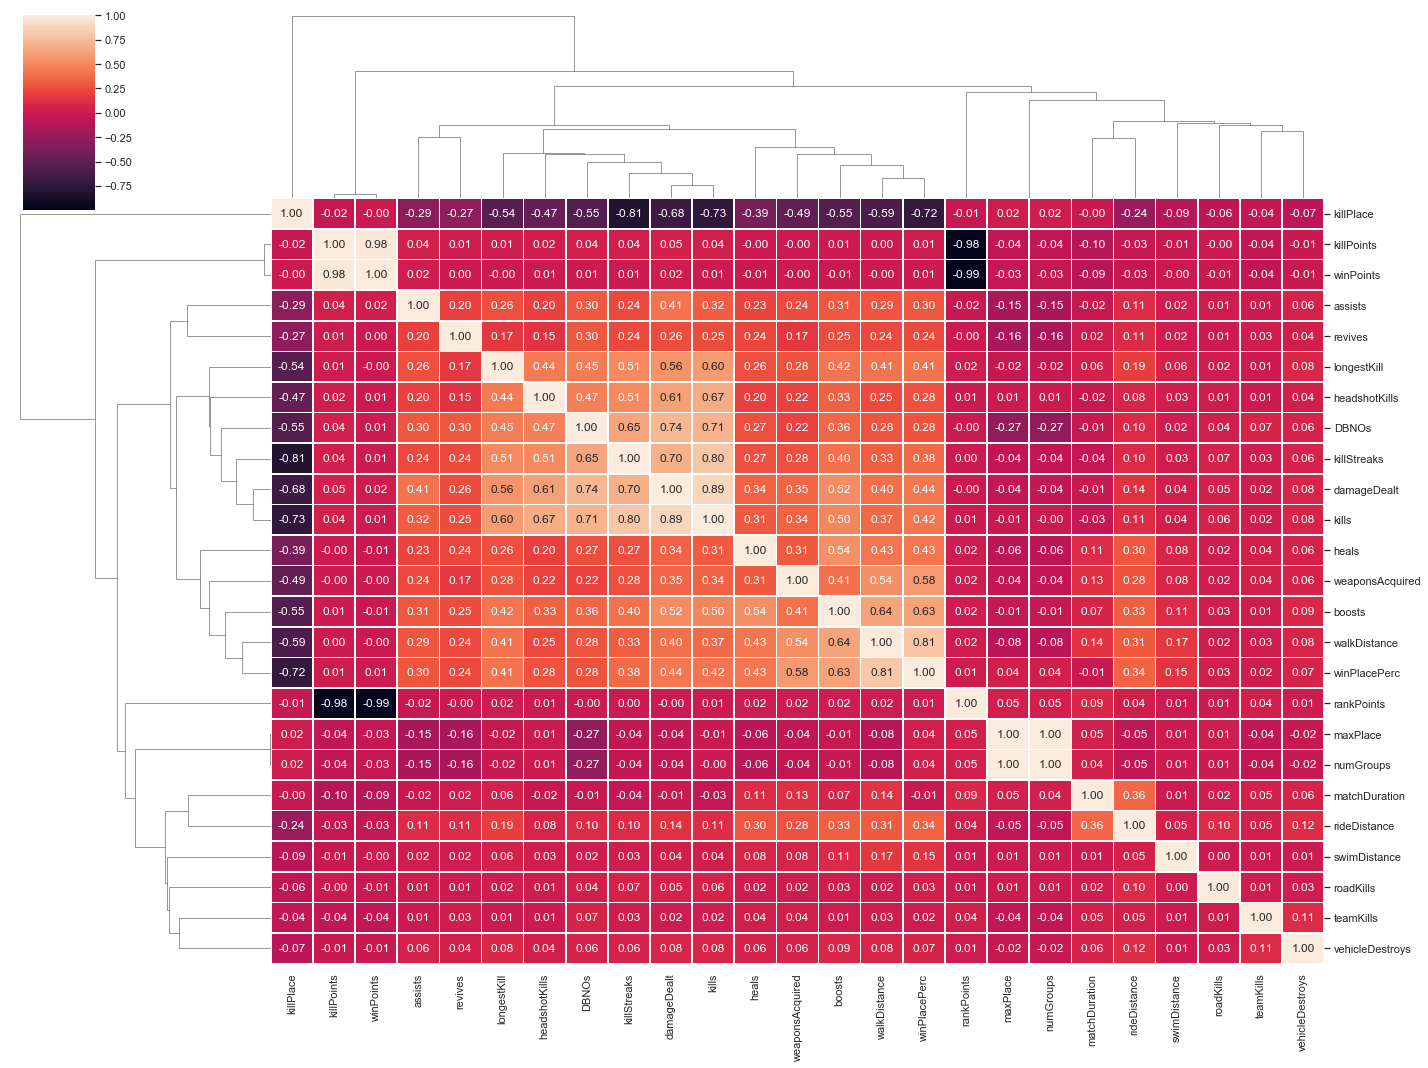

In [61]:
ax = sns.clustermap(df.corr(), annot=True, linewidths=.6, fmt= '.2f', figsize=(20, 15))
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


TOP 10% overview

Average number of kills: 2.6
Minimum: 0
The best: 72
95% of players within: 8.0 kills.


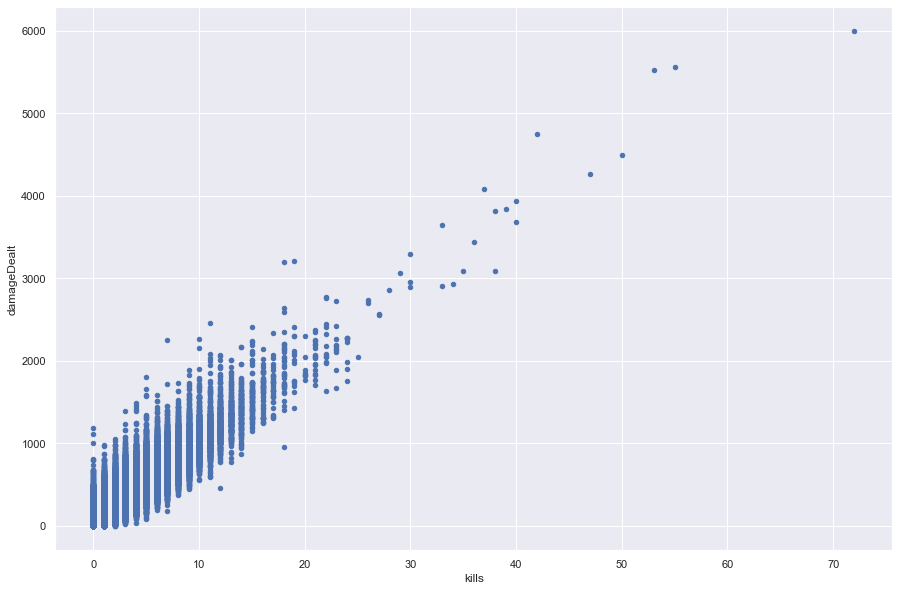

In [63]:
top10 = df[df["winPlacePerc"]>0.9]
print("TOP 10% overview\n")
print("Average number of kills: {:.1f}\nMinimum: {}\nThe best: {}\n95% of players within: {} kills." 
      .format(top10["kills"].mean(), top10["kills"].min(), top10["kills"].max(),top10["kills"].quantile(0.95)))

top10.plot(x="kills", y="damageDealt", kind="scatter", figsize = (15,10))
plt.show()

Average walking distance: 2813.1505810157823


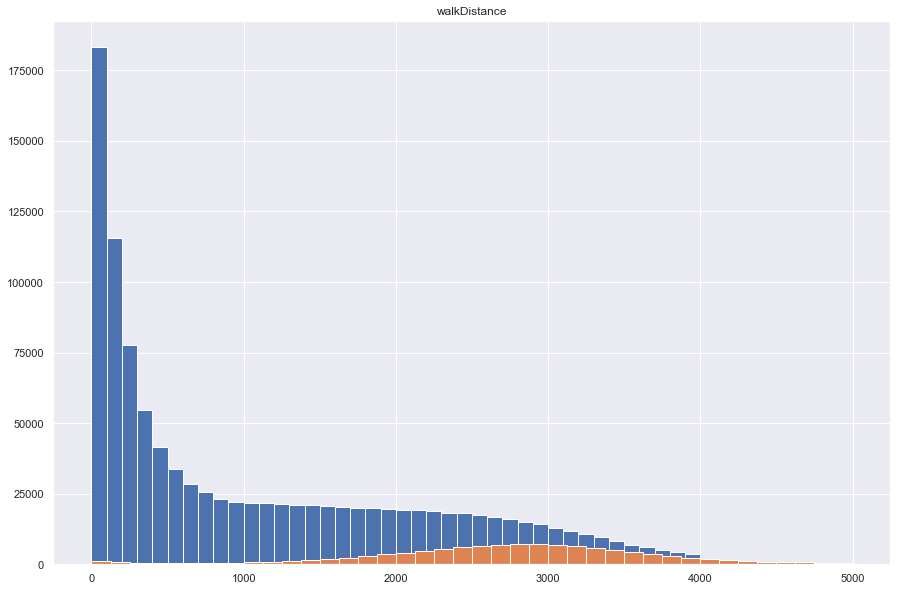

In [64]:
fig, ax1 = plt.subplots(figsize = (15,10))
walk.hist('walkDistance', bins=40, figsize = (15,10), ax = ax1)
walk10 = top10[top10['walkDistance']<5000]
walk10.hist('walkDistance', bins=40, figsize = (15,10), ax = ax1)

print("Average walking distance: " + str(top10['walkDistance'].mean()))

Average riding distance: 1396.5387151496416


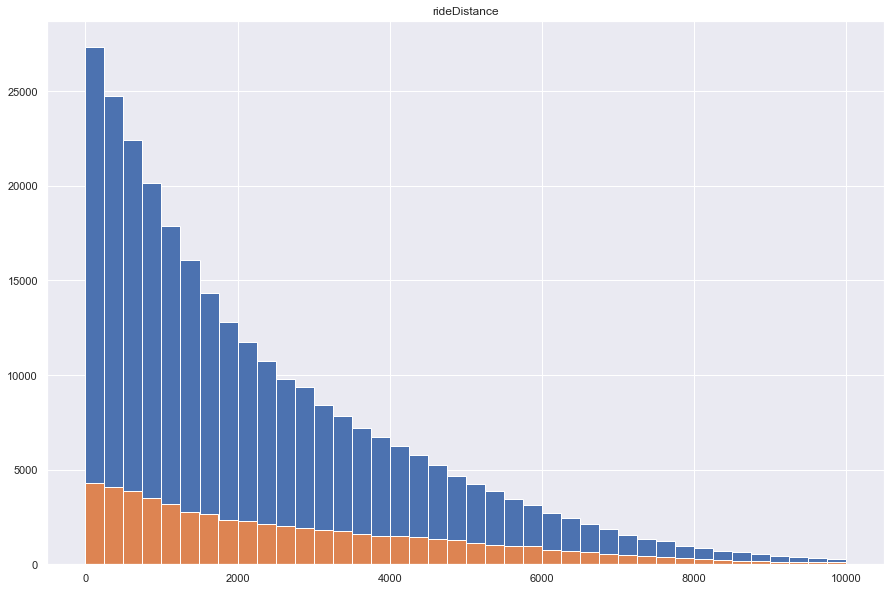

In [65]:
fig, ax1 = plt.subplots(figsize = (15,10))
ride.hist('rideDistance', bins=40, figsize = (15,10), ax = ax1)
ride10 = top10.query('rideDistance >0 & rideDistance <10000')
ride10.hist('rideDistance', bins=40, figsize = (15,10), ax = ax1)
print("Average riding distance: " + str(top10['rideDistance'].mean()))

In [66]:
print("On average the best 10% of players have the longest kill at {:.3f} meters, and the best score is {:.1f} meters." .format(top10["longestKill"].mean(), top10["longestKill"].max()))

On average the best 10% of players have the longest kill at 74.937 meters, and the best score is 1040.0 meters.


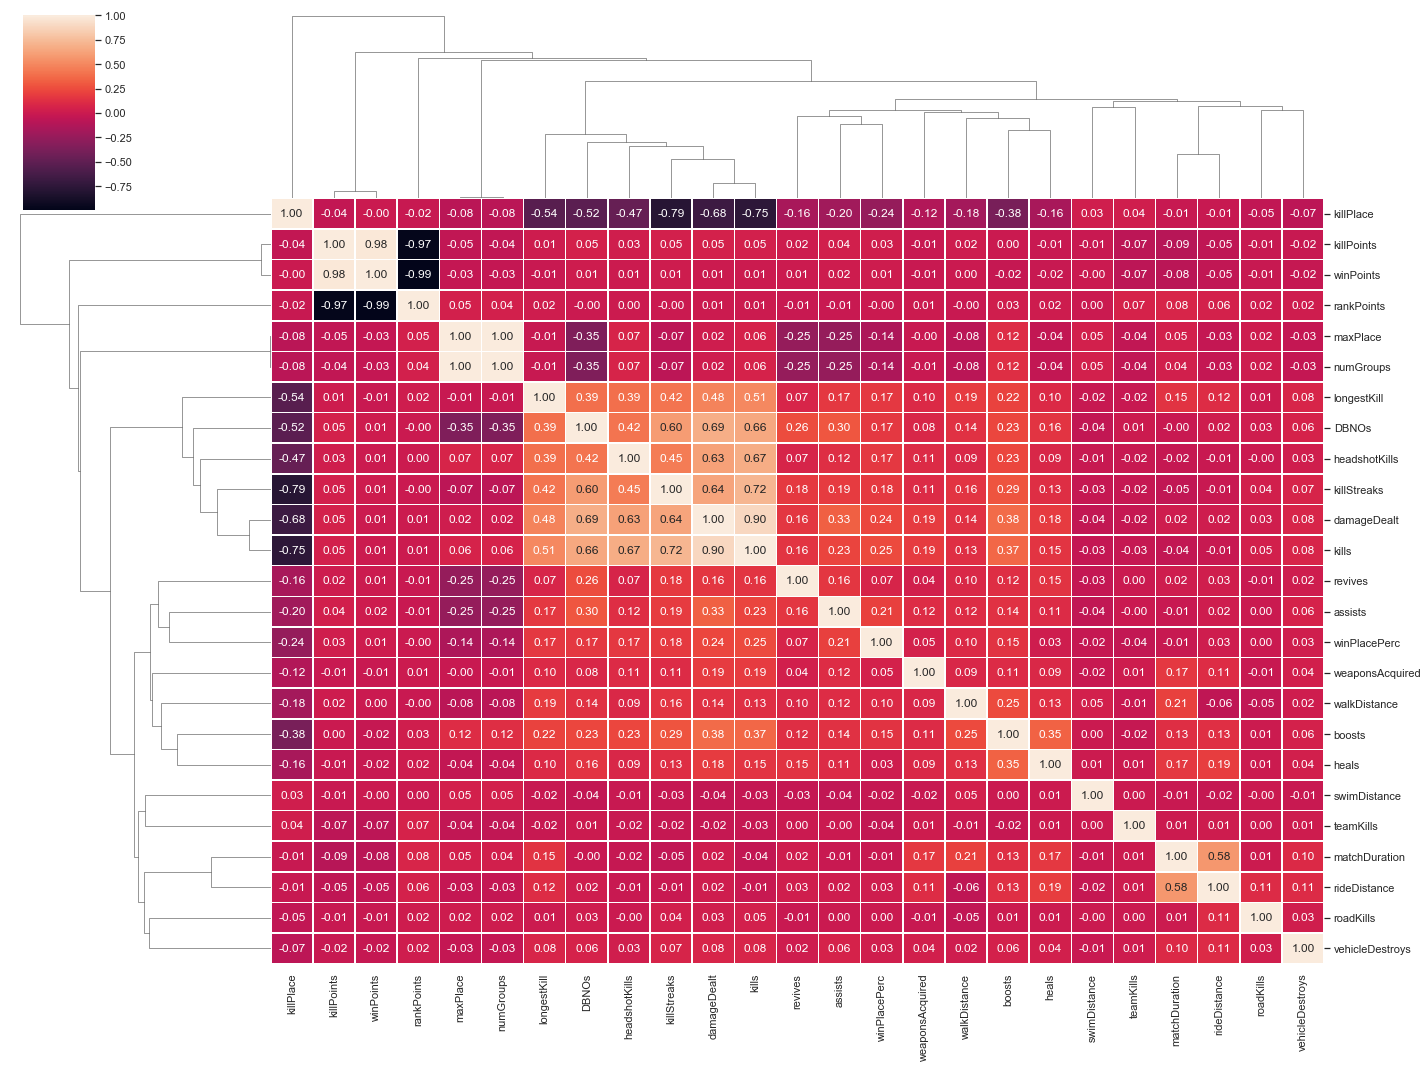

In [67]:
ax = sns.clustermap(top10.corr(), annot=True, linewidths=.5, fmt= '.2f', figsize=(20, 15))
plt.show()